# Machine Learning Challenge: Predict Titanic Survivors
More information on the [Kaggle site](https://www.kaggle.com/c/titanic/data)

The aim of this notebook is to solve the classic Titanic survivor prediction challenge, applying an end-to-end machine learning workflow. The dataset includes demographic and ticket information about the passengers, with the goal of predicting who survived the disaster. 

The process includes:

- Exploratory data analysis and visualization of main features and their relation to the target variable.
- Careful data preprocessing and encoding of categorical variables.
- Feature scaling to improve algorithm performance.
- Hyperparameter optimization with cross-validation for Random Forest and Support Vector Classifier.
- Comprehensive model evaluation using multiple metrics: accuracy, precision, recall, F1-score, ROC-AUC, and visualization of results.
- Model comparison, feature importance analysis, and example predictions.

## Library Imports

In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install seaborn
%pip install scikit-learn

import joblib
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

## Load and Inspect the Data

In [2]:
# get titanic & test csv files as a DataFrame
training = pd.read_csv("./titanic/train.csv")

In [3]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.describe() # some interesting statistics for features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training.keys() # Show features names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Variable Description
- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Target and Feature Distributions

<Axes: xlabel='Sex', ylabel='Survived'>

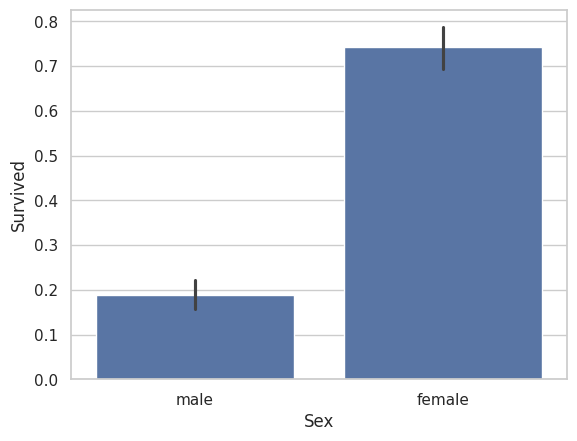

In [7]:
# Survived rate by sex
sns.barplot(x="Sex", y="Survived", data=training)

<Axes: xlabel='Pclass', ylabel='Survived'>

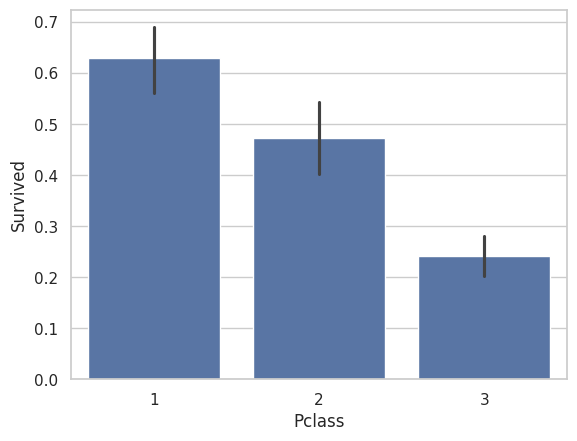

In [8]:
# Survived rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=training)

<Axes: xlabel='Embarked', ylabel='Survived'>

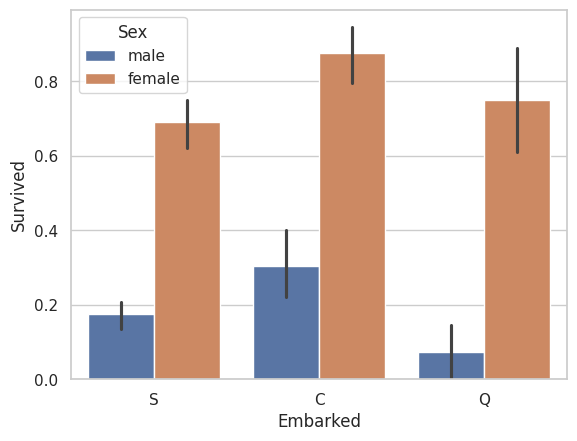

In [9]:
# Survived rate by Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=training)

<Axes: xlabel='Pclass', ylabel='Survived'>

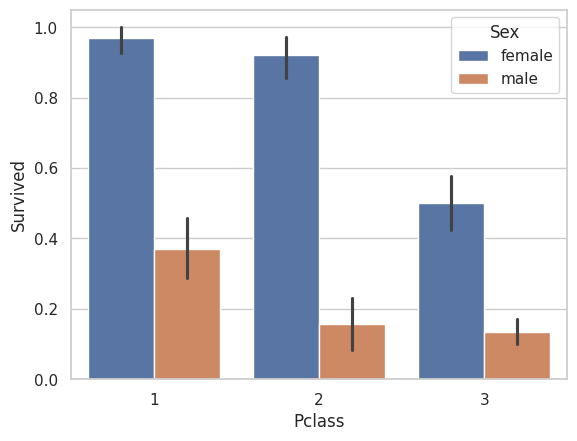

In [10]:
# Survived rate by Pclas and Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)

<Axes: xlabel='Pclass', ylabel='Survived'>

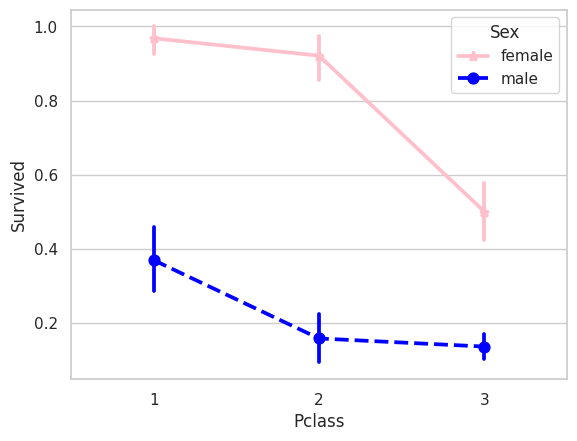

In [11]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

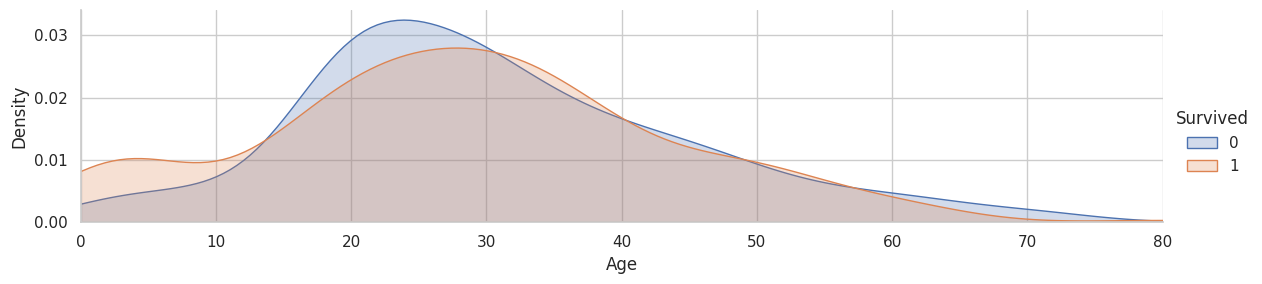

In [12]:
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(training, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()

## Feature Engineering and Data Cleaning

In [13]:
# Drop columns not used for modeling
training = training.drop(['Name','Ticket', 'Cabin'], axis=1)
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [14]:
# Filling missing age values with median
training.Age = training.Age.fillna(training.Age.median())

In [15]:
# Age is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [16]:
# Check Embarked value counts (and nulls)
Counter(training.Embarked.values)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [17]:
# Fill missing Embarked with 'S'
training.Embarked = training.Embarked.fillna('S')

In [18]:
# Embarked is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [19]:
# View Pclass counts
Counter(training.Pclass.values)

Counter({np.int64(3): 491, np.int64(1): 216, np.int64(2): 184})

## One-hot Encoding of Categorical Features

In [20]:
# Create dummies for Embarked, Sex, and Pclass
embark_dummies_titanic  = pd.get_dummies(training['Embarked'])
sex_dummies_titanic  = pd.get_dummies(training['Sex'])
pclass_dummies_titanic  = pd.get_dummies(training['Pclass'], prefix="Class")

In [21]:
# Preview dummy DataFrames
embark_dummies_titanic.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [22]:
sex_dummies_titanic.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [23]:
pclass_dummies_titanic.head()

,Class_1,Class_2,Class_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [24]:
# Drop original categorical columns and join dummies
training = training.drop(['Embarked', 'Sex', 'Pclass'], axis=1)
titanic = training.join([embark_dummies_titanic, sex_dummies_titanic, pclass_dummies_titanic])
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,True,False,True,False,False
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


## Scaled Continuous Variables

In [25]:
from sklearn.preprocessing import StandardScaler

# Identify continuous features to scale
continuous_features = ['Age', 'Fare']

scaler = StandardScaler()
titanic[continuous_features] = scaler.fit_transform(titanic[continuous_features])
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
0,1,0,-0.565736,1,0,-0.502445,False,False,True,False,True,False,False,True
1,2,1,0.663861,1,0,0.786845,True,False,False,True,False,True,False,False
2,3,1,-0.258337,0,0,-0.488854,False,False,True,True,False,False,False,True
3,4,1,0.433312,1,0,0.420730,False,False,True,True,False,True,False,False
4,5,0,0.433312,0,0,-0.486337,False,False,True,False,True,False,False,True


## Prepare Data for Modeling

In [26]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_all = titanic.drop('Survived', axis=1)
y_all = titanic.Survived

# Save as CSV for future use
X_all.to_csv('test.csv')
X_all.set_index('PassengerId', inplace=True)

In [27]:
# Train/test split
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train shape: (712, 12)
Test shape: (179, 12)
Train target shape: (712,)
Test target shape: (179,)


## Model Training

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
# SVC with GridSearchCV (you may use SVC instead of LinearSVC for probability support)
from sklearn.svm import SVC
svc_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(probability=True, random_state=42), svc_params, cv=5, n_jobs=-1, scoring='accuracy')
svc_grid.fit(X_train, y_train)
print("Best SVC params:", svc_grid.best_params_)
svc_clf = svc_grid.best_estimator_
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)
print("SVC accuracy:", acc_svc)

Best SVC params: {'C': 1, 'kernel': 'rbf'}
SVC accuracy: 0.8212290502793296


In [30]:
# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)
rf_clf = rf_grid.best_estimator_
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print("Random Forest accuracy:", acc_rf)

Best Random Forest params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest accuracy: 0.8156424581005587


## Feature Importance

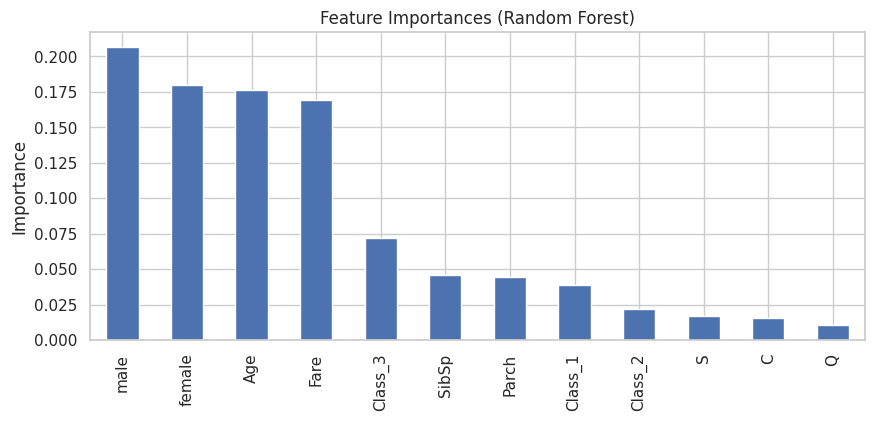

In [31]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.show()


## Model Evaluation


Random Forest Evaluation:
Accuracy: 0.8156
Precision: 0.7719
Recall: 0.6875
F1-score: 0.7273
ROC-AUC: 0.8537

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       115
           1       0.77      0.69      0.73        64

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



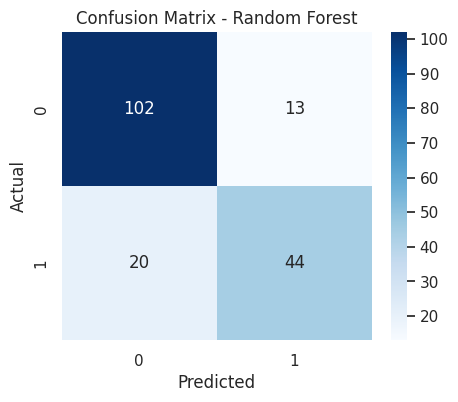

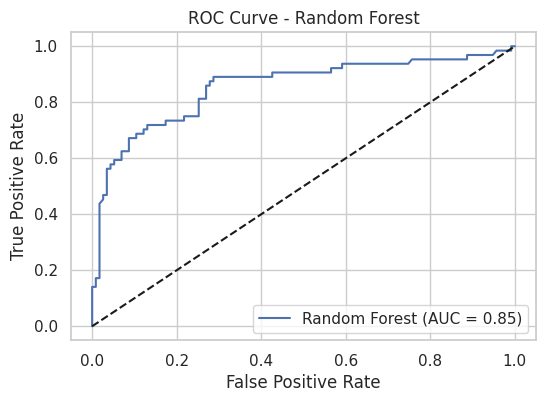


SVC Evaluation:
Accuracy: 0.8212
Precision: 0.7963
Recall: 0.6719
F1-score: 0.7288
ROC-AUC: 0.8344

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       115
           1       0.80      0.67      0.73        64

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



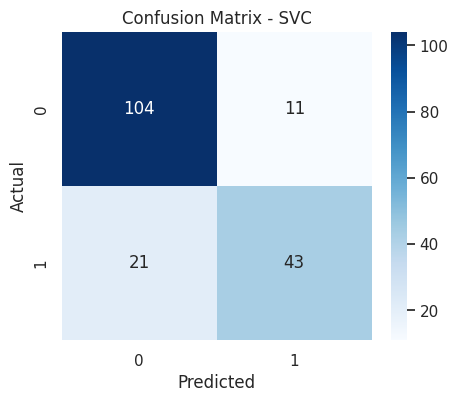

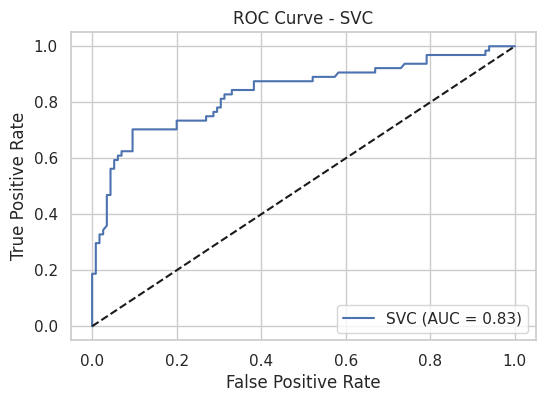

In [32]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)

def detailed_evaluation(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = None
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            y_prob = model.decision_function(X_test)
        except AttributeError:
            y_prob = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

    # Return dictionary of metrics for use in a DataFrame
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

# Evaluate both models in detail
results_rf = detailed_evaluation(rf_clf, X_test, y_test, "Random Forest")
results_svc = detailed_evaluation(svc_clf, X_test, y_test, "SVC")

## Example Predictions

Rose DeWiit Bukater
- Pclass: 1st Class
- Sex: Female
- Age: 17
- SibSp: 0
- Parch: 1
- Fare: 53.1000
- Embarked: 'S'

In [33]:
Rose_DeWiit_Bukater = [17, 0, 1, 53.1000, 0, 0, 1, 1, 0, 1, 0, 0 ]

In [34]:
len(Rose_DeWiit_Bukater)

12

Jack Dawson
- Pclass: 3rd Class
- Sex: Male
- Age: 23
- SibSp: 0
- Parch: 0
- Fare: 0
- Embarked: 'S'

In [35]:
Jack_Dawson = [23, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1 ]

In [36]:
svc_clf.predict([Rose_DeWiit_Bukater])

array([0])

In [37]:
svc_clf.predict([Jack_Dawson])

array([0])

In [38]:
rf_clf.predict([Rose_DeWiit_Bukater])

array([1])

In [39]:
rf_clf.predict([Jack_Dawson])

array([0])

## Model Performance Comparison

In [40]:
model_performance = pd.DataFrame([results_rf, results_svc])
model_performance = model_performance.sort_values(by="Accuracy", ascending=False)
display(model_performance)

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
1,SVC,0.821229,0.796296,0.671875,0.728814,0.834443
0,Random Forest,0.815642,0.771930,0.687500,0.727273,0.853736


## Save and Load Models

In [41]:
import pickle
pickle.dump(svc_clf, open('./models/linsvc_clf.pkl', 'wb'))
pickle.dump(rf_clf, open('./models/rf_clf.pkl', 'wb'))

In [42]:
linsvc = pickle.load(open( "./models/linsvc_clf.pkl", "rb" ))
rf = pickle.load(open( "./models/rf_clf.pkl", "rb" ))

In [43]:
linsvc.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([0, 0])

In [44]:
rf.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])

## Conclusion

In this project, we implemented and optimized two supervised learning models: Support Vector Classifier (SVC) and Random Forest—to predict Titanic passenger survival.

**Key results:**

- **SVC achieved the highest accuracy:** 0.82 on the test set, closely followed by Random Forest with an accuracy of 0.81 as well. Both models demonstrated balanced performance across other metrics, including precision, recall, F1-score, and ROC-AUC.
- **Precision and recall:** Both models showed higher precision for predicting survivors (class 1) than recall, indicating that while the models are good at identifying survivors, they miss some actual survivors (a common pattern due to class imbalance).
- **Feature importance analysis** showed that variables like Sex (female), Fare, and Pclass were the most influential predictors, aligning with the historical fact that women and first-class passengers had higher survival rates.
- **ROC-AUC scores** for both models were above 0.83, indicating good discrimination ability between the two classes.

The detailed evaluation, confusion matrices, and ROC curves provided strong evidence that the pipeline is robust and reliable.

**Opportunities for further improvement** include more sophisticated feature engineering (for example, extracting titles from names, adding family size, or cabin grouping), using ensemble models, or tuning the threshold for decision boundaries to optimize specific metrics.

The final pipeline is well-structured, fully reproducible, and ready for API deployment or further research.
